# IS-Lab2 (LT)
Intelektualiosios sistemos. Antrojo laboratorinio darbo užduotis.
# Tikslas
Išmokti savarankiškai suprogramuoti paprasto netiesinio aproksimatoriaus mokymo (parametrų skaičiavimo) algoritmą.
# Užduotys (maks. 8 balai)
1. Sukurkite daugiasluoksnio perceptrono koeficientams apskaičiuoti skirtą programą. Daugiasluoksnis perceptronas turi atlikti aproksimatoriaus funkciją. Daugiasluoksnio perceptrono struktūra:

In [2]:
import numpy as np
import matplotlib.pyplot as plt

- vienas įėjimas (įėjime paduodamas 20 skaičių vektorius X, su reikšmėmis intervale nuo 0 iki 1, pvz., x = 0.1:1/22:1; ).

In [3]:
x = np.linspace(0.1, 1, 20)

- vienas išėjimas (pvz., išėjime tikimasi tokio norimo atsako, kurį galima būtų apskaičiuoti pagal formulę: y = (1 + 0.6\*sin(2\*pi\*x/0.7)) + 0.3\*sin(2\*pi\*x))/2; - kuriamas neuronų tinklas turėtų "modeliuoti/imituoti šios formulės elgesį" naudodamas visiškai kitokią matematinę išraišką nei ši);

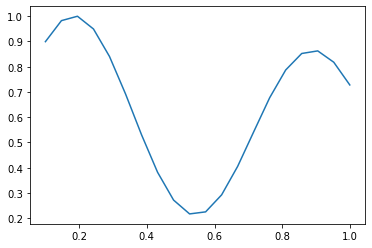

In [14]:
y_given = (1 + 0.6 * np.sin(2 * np.pi * x / 0.7) + 0.3 * np.sin(2 * np.pi * x) / 2)
y_given /= np.max(np.abs(y_given),axis=0)
plt.plot(x, y_given)

- vienas paslėptasis sluoksnis su hiperbolinio tangento arba sigmoidinėmis aktyvavimo funkcijomis neuronuose (neuronų skaičius: 4-8);
- tiesine aktyvavimo funkcija išėjimo neurone;
- mokymo algoritmas - Backpropagation (atgalinio sklidimo).

In [15]:
def sig(x):
 return 1/(1 + np.exp(-x))

def sig_deriv(z):
    return z*(1 - z)

In [26]:
class NeuralNet:
    def __init__(self, dataset_size, train_iter):
        self.weights_l1 = np.random.rand(1,5)
        self.bias_l1    = np.random.rand(self.weights_l1.shape[1])
        self.weights_l2 = np.random.rand(5,1)
        self.bias_l2    = np.random.rand(self.weights_l2.shape[1])
        self.out        = 1
        self.err        = np.zeros([dataset_size])
        self.err_n      = 0
        self.avg_err    = np.zeros(train_iter)
        self.curr_iter  = 0
        self.learn_step = 0.3

    def feedforward(self):
        self.layer1 = sig(np.dot(self.input, self.weights_l1) + self.bias_l1)
        self.out    = sig(np.dot(self.layer1, self.weights_l2) + self.bias_l2)
        
    def backprop(self):
        d_weights_l2 = np.dot(self.layer1.T, (2*(self.y - self.out) * sig_deriv(self.out)))
        d_weights_l1 = np.dot(self.input.T,  (np.dot(2*(self.y - self.out) * sig_deriv(self.out), self.weights_l2.T) * sig_deriv(self.layer1)))
        self.weights_l1 += d_weights_l1 * self.learn_step
        self.weights_l2 += d_weights_l2 * self.learn_step
        self.err[self.err_n] = np.absolute(self.y - self.out)
        self.err_n += 1
        
    def update_error(self):
        self.avg_err[self.curr_iter] = np.average(self.err)
        self.err.fill(0)
        self.err_n = 0
        self.curr_iter += 1
        
    def report_error(self):
        plt.plot(self.avg_err)
        plt.show()
    
    def update_input_output(self, x, y):
        self.input = x
        self.y = y
        
    def predict_for_data_set(self, x, y):
        self.y_predict = np.zeros(y.shape)
        self.iter = 0
        for x_temp in x:
            self.layer1 = sig(np.dot(x_temp, self.weights_l1) + self.bias_l1)
            self.y_predict[self.iter] = sig(np.dot(self.layer1, self.weights_l2) + self.bias_l2)
            self.iter += 1
        plt.plot(x, self.y_predict, label="prediction")
        plt.plot(x, y, label="actual")
        plt.legend()
        plt.show()

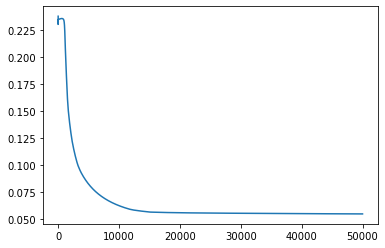

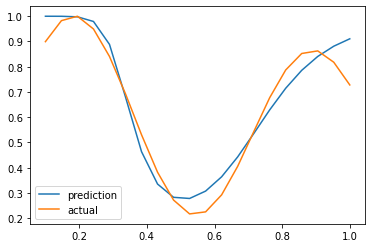

In [27]:
network = NeuralNet(x.shape[0], 50000)
for n in range(50000):
    for i, a in zip(x, y_given):
        network.update_input_output(i, a)
        network.feedforward()
        network.backprop()
    network.update_error()
network.report_error()
network.predict_for_data_set(x, y_given)

# Papildoma užduotis (papildomi 2 balai)
Išspręskite paviršiaus aproksimavimo uždavinį, kai tinklas turi du įėjimus ir vieną išėjimą.
# Rekomenduojama literatūra
- Neural Networks and Learning Machines (3rd Edition), <...> psl., <...> lentelė